## Website Landing Page A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction



For this project, we are trying to understand the results of an A/B test run by an e-commerce website. The goal is  to help the company understand if they should implement the new page


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure we get the same answers 
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [17]:

nuser=df.user_id.nunique()
nuser

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique()/nuser

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df[(df.group == 'treatment') != (df.landing_page == 'new_page')].shape[0]

3893

f. Do any of the rows have missing values?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Now use the answer to create a new dataset that meets the specifications from the quiz.  Store  new dataframe in **df2**.

In [7]:
df2=df[(df['group']=="treatment") == (df['landing_page']=='new_page')]


In [8]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions below.

a. How many unique **user_id**s are in **df2**?

In [9]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
df2[df2.duplicated(['user_id'],keep=False)]['user_id']


1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2['user_id']== 773192]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2=df2.drop_duplicates(subset=['user_id'], keep='first')

`4.` Use **df2** in the cells below to answer the questions below.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
df2.query('group=="control" and converted == 1').user_id.nunique()/df2.query('group =="control"').user_id.nunique()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
df2.query('group=="treatment" and converted == 1').user_id.nunique()/df2.query('group =="treatment"').user_id.nunique()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
df2.query('landing_page == "new_page"').user_id.nunique()/df2.user_id.nunique()

0.5000619442226688


The probability of an individual converting regardless of the page they receive is 11.96%;
The probability of an individual in the control group to convert is 12.04%;
The probability of an individual in the treatment group to convert is 11.89%;
The conversion difference between people in control group and treatment is very similar. There is no sufficient evidience that new treatment page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

 




<br>
<br>
Null hypothesis H0: Pnew - Pold <=0

Alternative hypotheiss H1: Pnew - Pold >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [42]:
# conversion rate under null means both new page and old page has same conversion rate 
Pnew= round(float(df2.query('converted ==1').user_id.nunique())/float(df2.user_id.nunique()),4)
  
Pnew


0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [43]:
Pold= round(float(df2.query('converted ==1').user_id.nunique())/float(df2.user_id.nunique()),4)
Pold

0.1196

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
Nnew=df2.query('group =="treatment"').user_id.nunique()
Nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [45]:
Nold=df2.query('group =="control"').user_id.nunique()
Nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [46]:
new_page_converted=np.random.choice([0,1],Nnew, p=(Pnew, 1-Pnew) )
new_page_converted

array([1, 1, 1, ..., 1, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [47]:
old_page_converted=np.random.choice([0,1],Nold, p=(Pold, 1-Pold) )
old_page_converted


array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [48]:
new_page_converted.mean()-old_page_converted.mean()

0.0013855406767026013

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [49]:
# create sampling distribution for conversion difference with bootstrap
p_diffs=[]
size=df.shape[0]
for n in range(10000):
    test=df2.sample(size, replace=True)
    new_page_converted = np.random.choice([0,1],Nnew, p=(Pnew,1-Pnew))
    old_page_converted = np.random.choice([0,1],Nold, p=(Pold,1-Pold))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**. 

In [50]:
# calcuate number of converted users in treatment and control group
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
# calculate conversion rate for both groups
actual_cvt_new = float(convert_new)/ float(Nnew) 
actual_cvt_old = float(convert_old)/ float(Nold)
# oberved difference between treatment and control group
obs_diff = actual_cvt_new - actual_cvt_old

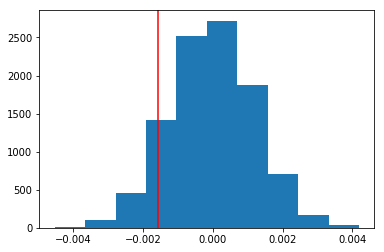

In [51]:
# convert simulated p_diffs into array, plot p_diffs distribution

p_diffs=np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(obs_diff, c='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [52]:
# distribution under null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

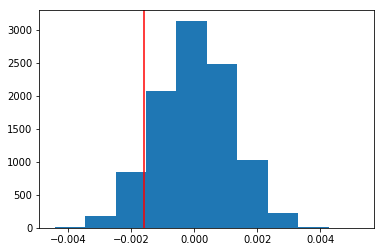

In [53]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')

In [54]:
# compute the proportion where null_vals is larger than actual difference observed in ab_test.csv data set
(null_vals > obs_diff).mean()

0.90359999999999996



With type I error of 5%, our calculated Pold is >0.05. From this calculation, it is not statiscally significant to reject null hypothesis. 
<br>Thus, there is no strong evidence to support that new page is better than old page to convert users. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [25]:
import statsmodels.api as sm


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now use `stats.proportions_ztest` to compute your test statistic and p-value.

In [56]:
n_new=df2.query('group =="treatment"').user_id.nunique()
n_old=df2.query('group =="control"').user_id.nunique()


z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value



(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [59]:
from scipy.stats import norm
# calculate significance of z_score
print (norm.cdf(z_score))
# critical score for 95% confidence 
print(norm.ppf(1-(0.05/2)))

0.094941687241
1.95996398454



This is a one-tail test, which need z_score >1.96 to be significant. Our z_score is within -1.96 - 1.96 critial value range. This means both z_score and p_value agrees with previous findings in j and k.
<br>
<br> 
There is no significant difference in conversion rate of two landing pages, and we could not reject null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [26]:
df2['intercept']=1
df2[['treatment','control']]=pd.get_dummies(df2['group'])
df2['ab_page']=df2['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [27]:
logit_mod1=sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results=logit_mod1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 31 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        06:18:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""


<br>
For regression model: 
<br>
Null hypothesis: two landing page has same conversion rate 
<br>
Alternative hypthesis: two landing pages are different in conversion rate
    
For part II:
It assumes the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, compared to question c-e,they have different explainory varibale. 
<br> 
The p-value for ab_page parameter is 0.19. This means parameter "ab_page" is not significant in conversion rate


<br>
<br>
Post above evaluation, it seems we need to add other factors that might influence this individual conversion. Factors like country where users are located, the time users use page. By adding more factors into regression model, this might make model 
expaination more diffcult. If addtional variables has dependence on other variable, we may need more complex model to accomodate it. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. I will read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  

In [29]:
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [30]:
df3=df2.merge(df_countries, on='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,1,US


In [31]:
df3.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [32]:
df3[['CA','UK','US']]=pd.get_dummies(df3.country)
# remove 'CA' column to perform following regression
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,1,US,0,0,1


In [34]:
logit_mod2=sm.Logit(df3.converted, df3[['intercept', 'ab_page','US','UK']])
results2=logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 31 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        06:20:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [52]:
# explain the US and UK impact on conversion rate 
US_imp=round(np.exp(0.0408),2)
UK_imp=round(np.exp(0.0506),2)
print ('For every unit increase, US impact on conversion rate is {} times than Canada conversion rate;'.format(US_imp))
print ('For every unit increase, UK impact on conversion rate is {} times than Canada conversion rate;'.format(UK_imp))

For every unit increase, US impact on conversion rate is 1.04 times than Canada conversion rate;
For every unit increase, UK impact on conversion rate is 1.05 times than Canada conversion rate;


From above analysis, both US and UK has close to 1 times conversion rate than baseline country Canada
<br>
By adding country into consideration, both 'UK' and 'US' parameter has p value > type I error of 0.05. This means they are not statistically significant for conversion rate.

In [55]:
# to create new variable to consider country and new page interaction
# 'US_newpage' refers to user receive new page and live in US
# 'UK_newpage' refers to user receive new page and live in UK
df3['US_newpage']=df3['US']*df3['ab_page']
df3['UK_newpage']=df3['UK']*df3['ab_page']


In [56]:
logit_mod3=sm.Logit(df3.converted, df3[['intercept', 'ab_page','UK_newpage','US_newpage','UK','US']])
results3=logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 31 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        07:21:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0715      0.037    -55.798      0.000      -2.144      -1.999
ab_page        0.0674      0.052      1.297      0.195      -0.034       0.169
UK_newpage    -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_newpage    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK             0.0901      0.040      2.225      0.026       0.011       0.169
US             0.0644      0.038      1.679      0.093      -0.011       0.140
==============================================================================
"""

In [57]:
np.exp(results3.params)

intercept     0.126002
ab_page       1.069775
UK_newpage    0.924703
US_newpage    0.954198
UK            1.094247
US            1.066532
dtype: float64

<p style='text-align: justify;'>Conclusion: By adding interaction between country and new page received, the P value for 'ab_page','US', 'UK' and two new interaction terms ('UK_newpage', 'US_newpage') are all higher than 0.05. These results indicate they are not statistically significant for conversion rate. </p>